In [1]:
# Importing python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, recall_score,precision_score,f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle



In [65]:
df = pd.read_csv("C:/Users/Sheenu/Downloads/creditcard.csv")


In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Source Information
Time: Represents the number of seconds elapsed between the current transaction and the first transaction recorded in the dataset.

Amount: Denotes the transaction amount associated with each transaction.

Class: Serves as a label indicating the nature of the transaction. It takes a value of 1 for fraudulent transactions and 0 for legitimate ones.

V1-V28: May be result of a PCA Dimensionality reduction to protect user identities and sensitive features

In [67]:
# info will gonna help to know the all the  column details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
# we can have stats of df
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [70]:
# checking null values if any
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 # as there is no null values we dont need to further treatment for null values


In [71]:
#distrinution for ligit and fraundlent transaction
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

#  visualizing the class distribution of fraud and non-fraud transaction 

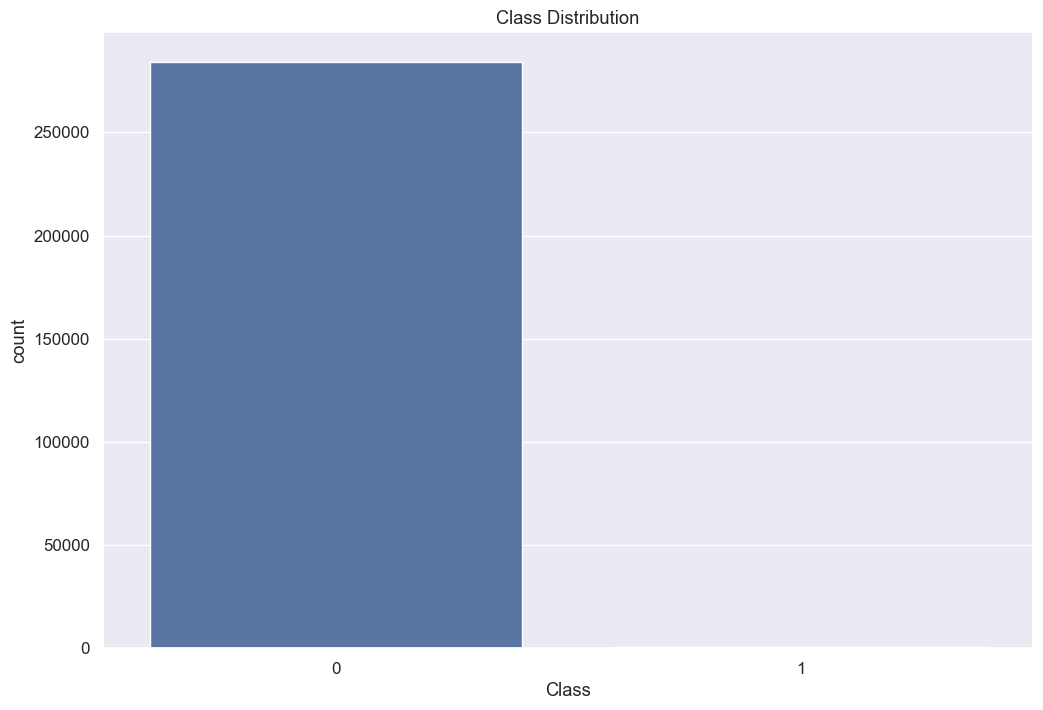

In [72]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

#  From above plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

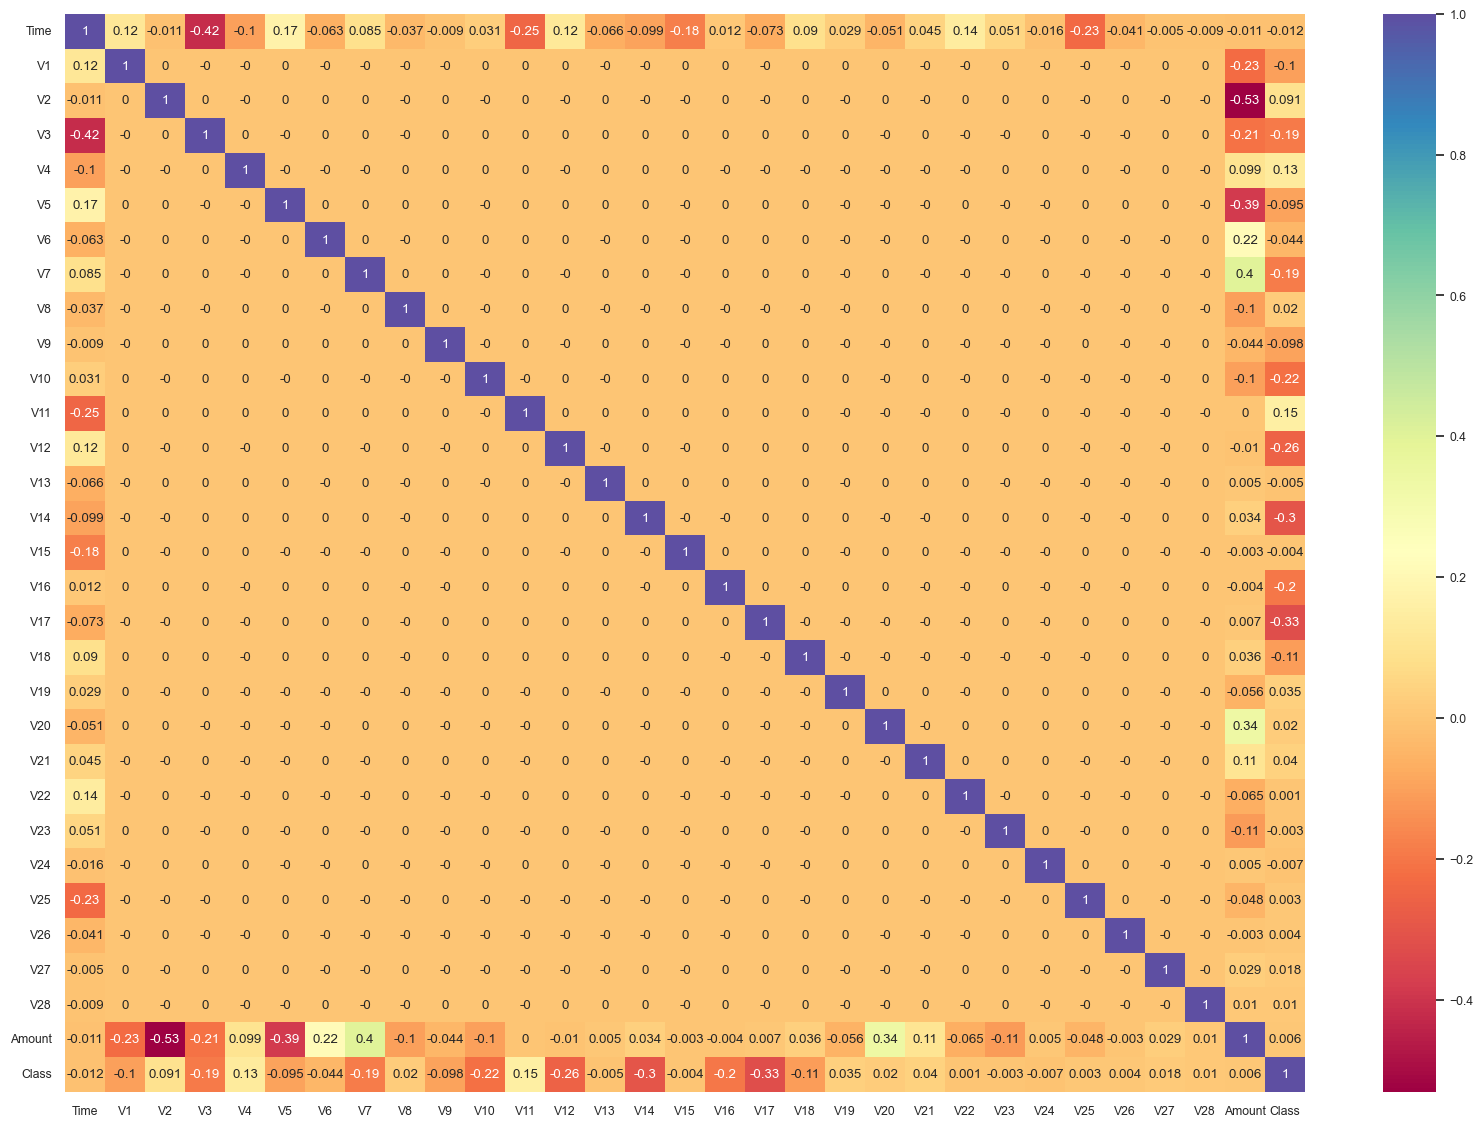

In [73]:
corr= round(df.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()


# From the above  heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:
Time and V3, with a correlation coefficient of -0.42 Amount and V2, with a correlation coefficient of -0.53 Amount and V4, with a correlation coefficient of 0.4. Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


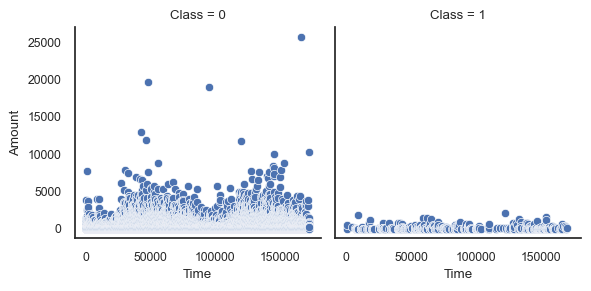

In [74]:
sns.set_style(style= 'white')
facet_grid = sns.FacetGrid(data=df, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

# all plot  and graph clearly indicating the  nonbalanced data . 
firstly we need to make differ the legit and fraud data and using smote for undersample can make the data balance.

In [75]:
# diffrentiating the fraud and legit data.
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

In [76]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


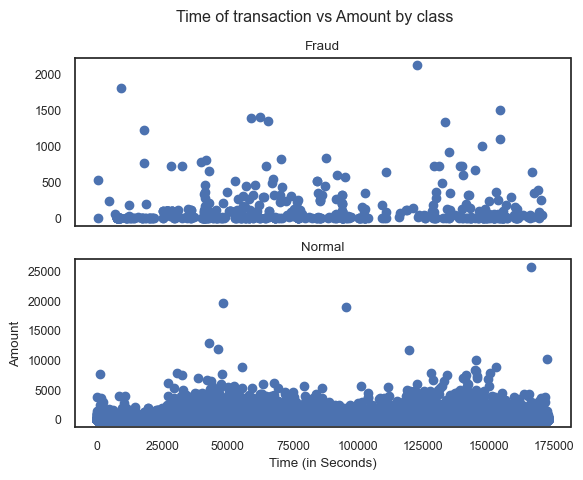

In [77]:
# now We Will check the fraudulent transactions occur more often during certain time frame 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [78]:
X = df.drop('Class', axis=1)
y = df['Class']

In [79]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


# # Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.



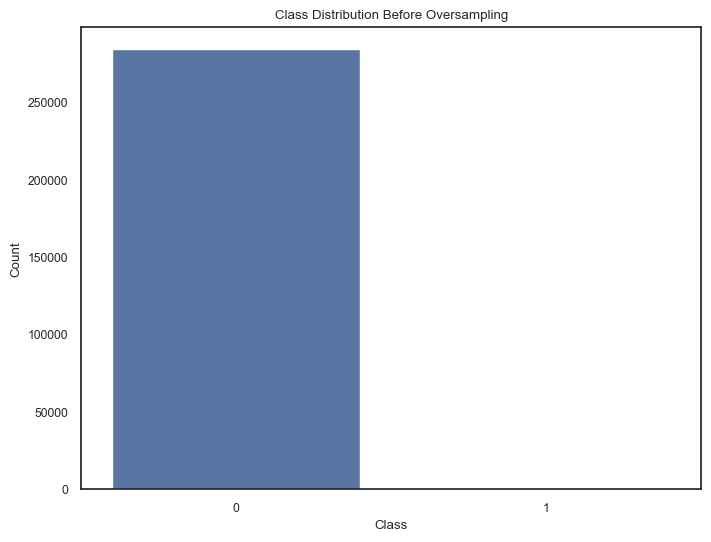

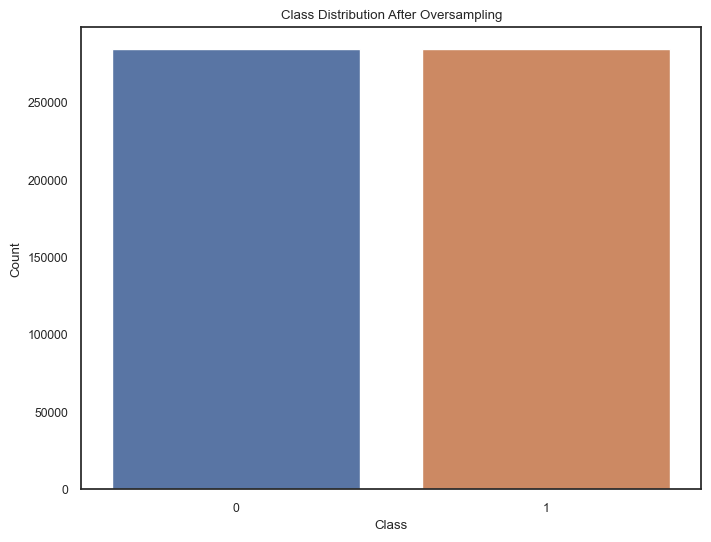

In [80]:
# Plot class distribution before oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [82]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398041, 30)
X_test shape: (170589, 30)
y_train shape: (398041,)
y_test shape: (170589,)


In [83]:
# Defining the pipeline for Logistic Regression
LR_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

In [84]:
# Defining the parameter grid for grid search with Logistic Regression
params_grid = {"logistic__class_weight": [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 50}, 'balanced']}


In [85]:
grid_search = GridSearchCV(LR_pipeline, params_grid, n_jobs=-1, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

C:\Users\Sheenu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                                    {0: 1, 1: 50},
                                                    'balanced']},
             scoring='f1')

In [86]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'logistic__class_weight': 'balanced'}


In [87]:
LR_best_model = grid_search.best_estimator_
y_pred_LR = LR_best_model.predict(X_test)

In [88]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

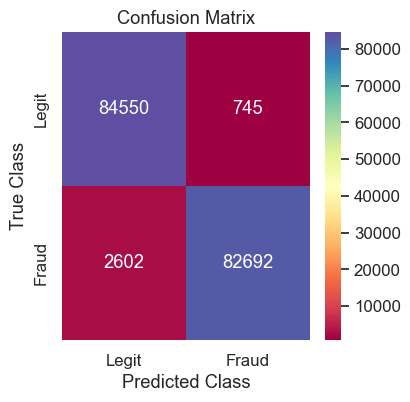

In [89]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_LR, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [90]:
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("Accuracy Score:", accuracy_score(y_test, y_pred_LR))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85295
           1       0.99      0.97      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Accuracy Score: 0.9803797431252894
ROC AUC Score: 0.980379679311513


# logistic model Overall seems to perform very well, with high precision, recall, accuracy, and ROC AUC score for both classes. This suggests that the model is effective in identifying fraudulent transactions while minimizing false positives.

In [93]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGBC = HistGradientBoostingClassifier(loss = 'binary_crossentropy', learning_rate=0.1, max_leaf_nodes=150, min_samples_leaf = 150, max_depth=15, random_state=0)



In [94]:
clf_HGBC.fit(X_train, y_train)

C:\Users\Sheenu\anaconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py:1823: FutureWarning: The loss 'binary_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


HistGradientBoostingClassifier(loss='binary_crossentropy', max_depth=15,
                               max_leaf_nodes=150, min_samples_leaf=150,
                               random_state=0)

In [95]:
Y_pred_HGBC = clf_HGBC.predict(X_test)
cm_HGBC = confusion_matrix(y_test, Y_pred_HGBC)

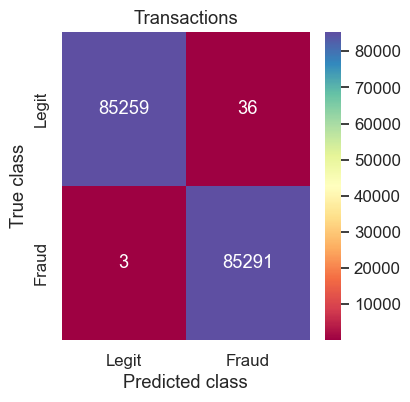

In [96]:
#confusion matrix:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_HGBC, cmap = 'Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [97]:
Y_pred_proba_train_HGBC = clf_HGBC.predict_proba(X_train)
roc_auc_score_Train_HGBC = roc_auc_score(y_train, Y_pred_proba_train_HGBC[:,1])
print('Train set roc-auc:', roc_auc_score_Train_HGBC)

Y_pred_proba_test_HGBC = clf_HGBC.predict_proba(X_test)
roc_auc_score_Test_HGBC = roc_auc_score(y_test, Y_pred_proba_test_HGBC[:,1])
print('Test set roc_auc:', roc_auc_score_Test_HGBC)

Train set roc-auc: 0.9999995804505766
Test set roc_auc: 0.9999953721927392


In [98]:
cr_HGBC = classification_report(y_test, Y_pred_HGBC)
print('HGBC')
print(cr_HGBC)

HGBC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



# Overall, the HGBC model demonstrates perfect performance on the test set, achieving 100% accuracy with perfect precision, recall, and F1-score for both classes. This suggests that the model is highly effective in distinguishing between legitimate and fraudulent transactions in this dataset.

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [100]:
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=param_grid, 
                           scoring='roc_auc',
                           cv=3, 
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [101]:
best_dtree_model = grid_search.best_estimator_

In [102]:
y_pred_dtree = best_dtree_model.predict(X_test)

In [103]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)



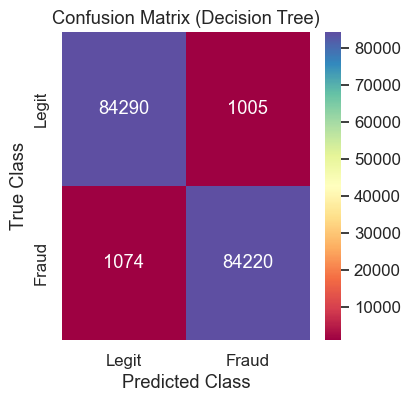

In [104]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_dtree, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [105]:
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dtree))
# Accuracy score
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dtree))

# ROC AUC score
print("ROC AUC Score (Decision Tree):", roc_auc_score(y_test, y_pred_dtree))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Accuracy Score (Decision Tree): 0.9878128132529062
ROC AUC Score (Decision Tree): 0.9878128108814027


# The Decision Tree model performs exceptionally well in distinguishing between legitimate and fraudulent transactions, as shown by its high accuracy, precision, recall, F1-score, and ROC AUC score.

In [106]:
from xgboost import XGBClassifier
folds = 3

# Define the range of hyperparameters
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

In [107]:
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

In [108]:
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [109]:
model_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", model_cv.best_params_)
print("Best ROC AUC score:", model_cv.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'learning_rate': 0.6, 'subsample': 0.6}
Best ROC AUC score: 0.9999758721013429


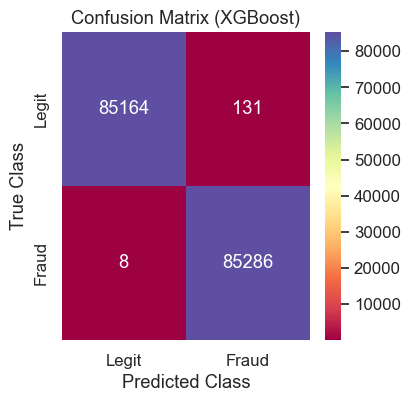

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [113]:

# Make predictions
y_pred_xgb = model_cv.predict(X_test)

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_xgb, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# the XGBoost model demonstrates exceptional performance in distinguishing between legitimate and fraudulent transactions, achieving perfect classification results across all evaluation metrics. This indicates that the model is highly effective and reliable for fraud detection in this dataset.

In [118]:
metrics = {
    'Logistic Regression': [accuracy_score(y_test, y_pred_LR), 
                            precision_score(y_test, y_pred_LR),
                            recall_score(y_test, y_pred_LR),
                            f1_score(y_test, y_pred_LR),
                            roc_auc_score(y_test, y_pred_LR)],
    'HistGradientBoostingClassifier': [accuracy_score(y_test, Y_pred_HGBC), 
                                       precision_score(y_test, Y_pred_HGBC),
                                       recall_score(y_test, Y_pred_HGBC),
                                       f1_score(y_test, Y_pred_HGBC),
                                       roc_auc_score(y_test, Y_pred_HGBC)],
    'Decision Tree': [accuracy_score(y_test, y_pred_dtree), 
                      precision_score(y_test, y_pred_dtree),
                      recall_score(y_test, y_pred_dtree),
                      f1_score(y_test, y_pred_dtree),
                      roc_auc_score(y_test, y_pred_dtree)],
    'XGBoost': [accuracy_score(y_test, y_pred_xgb), 
                precision_score(y_test, y_pred_xgb),
                recall_score(y_test, y_pred_xgb),
                f1_score(y_test, y_pred_xgb),
                roc_auc_score(y_test, y_pred_xgb)]
}


In [119]:
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC Score'])

In [120]:
metrics_df = metrics_df.transpose()

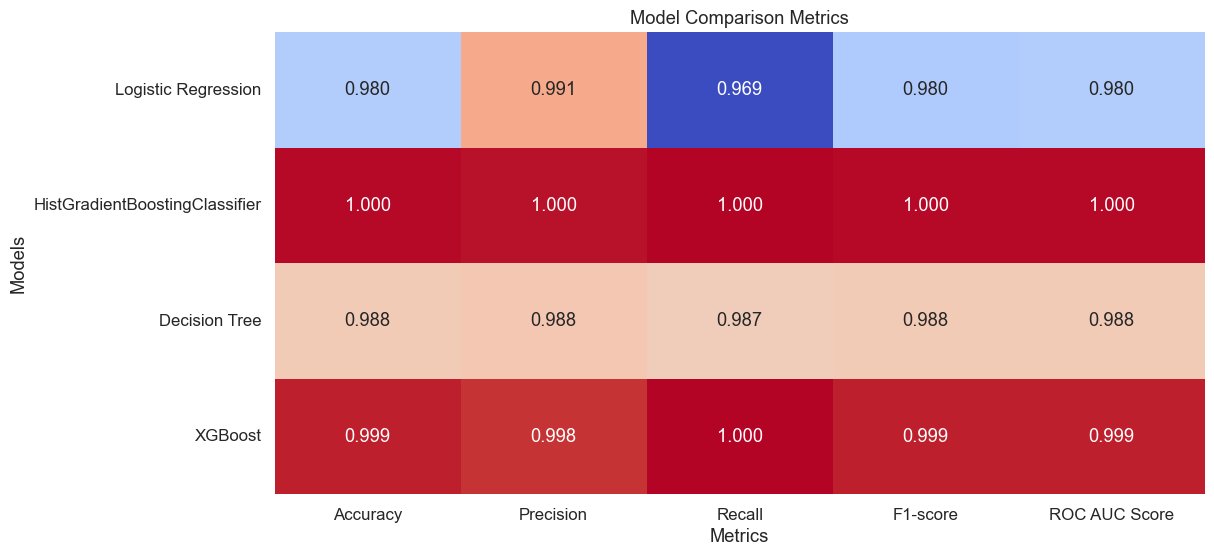

In [121]:
plt.figure(figsize=(12, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt=".3f", cbar=False)
plt.title('Model Comparison Metrics')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

In [122]:

# Dump and save Logistic Regression model
with open('LR_model.pkl', 'wb') as file:
    pickle.dump(LR_best_model, file)

# Dump and save HistGradientBoostingClassifier model
with open('HGBC_model.pkl', 'wb') as file:
    pickle.dump(clf_HGBC, file)

# Dump and save Decision Tree model
with open('dtree_model.pkl', 'wb') as file:
    pickle.dump(best_dtree_model, file)

# Dump and save XGBoost model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model_cv, file)

# model selection:
Overall, the models, including Logistic Regression, HistGradientBoostingClassifier, Decision Tree, and XGBoost, perform well in detecting fraudulent transactions. However, based on the comparison, the HistGradientBoostingClassifier stands out as the best-performing model across multiple metrics. Additionally, the XGBoost model has the potential to perform even better with hyperparameter tuning.